# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

# Описание данных

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1. Обзор данных

Перед началом работы импортируем нужные библиотеки и прочитаем файл с данными, предварительно сохранив его в отдельной переменной. Затем посмотрим, что представляет из себя таблица, выведя ее на экран.

In [1]:
# импорт нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# чтение файла и вывод таблицы на экран
games = pd.read_csv('/datasets/games.csv', sep = ',')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Видим пропуски и неуместные типы данных, некорректные названия столбцов. Продолжаем обзор.

In [3]:
# вывод общей информации по таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбцах `Year_of_Release` и `Critic_Score` данные имеют тип `float` - год и оценка должны быть целыми числами. Столбец `User_Score` имеет тип `object`, хотя там должны быть числа. Посмотрим, какие там значения.

In [4]:
# проверка уникальных значений
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Нашлось. Это `tbd`, или "to be determined" - используется, если какая-то информация еще не определена, служит для отметки неясностей или пропусков, которые надо заполнить. В данном столбце это означает, что количества отзывов от игроков недостаточно. Фактически это пропущенное значение, и обработать его надо как пропуск. Разумно заменить целые числа на числа с плавающей точкой, поскольку большинство оценок - дробные числа.

In [5]:
# вывод описательной статистики
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Здесь со значениями все в порядке, идем дальше. Проверим полные и неполные дубликаты.

In [6]:
# проверка уникальных значений
display(games['Name'].unique())
display(games['Platform'].unique())
display(games['Genre'].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Названий игр слишком много. Если там есть неполные дубликаты, то это, скорее всего, названия разных частей одной игры. С платформами и жанрами все в порядке.

In [7]:
# проверка полных дубликатов
games.duplicated().sum()

0

Теперь займемся пропусками.

In [8]:
# подсчет пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# то же самое в процентах
games.isna().sum()/games.shape[0]*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

Есть пропуски в 6 столбцах. Начнем с названия игры.

In [10]:
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Предположительно, это одна и та же игра, но в одной строке указаны продажи в Америке и Европе, а в другой - в Японии. Данные не подлежат восстановлению и будут удалены. Пропуски в столбце `Genre` также исчезнут.

Теперь год релиза. Возможно, в открытых источниках не было данных о годе выхода некоторых игр. Пропуски составляют 1,6% от всех данных. Это незначительное количество. Средним или медианой их не заполнить. "Нормальных" данных достаточно для анализa, поэтому можно было бы оставить все как есть. Но чтобы заменить тип данных в столбце на целочисленный, с пропусками надо что-то сделать. Заменим их на 0.

Перейдем к оценке критиков. Может быть, в прежние времена игры еще не оценивались, а сейчас некоторые игры по каким-либо причинам не могут пройти процедуру оценки. Некорректно было бы заполнять пропуски медианой или средним, ведь каждая игра индивидуальна. Но можно заполнить их маркерным значением (-1, например).

Ситуация с оценкой игроков такая же. Возможно, в какой-то период оценки не собирались сервисами. Заменим пропуски на -1.

Остался рейтинг ESRB. В столбце данные выражаются буквами-категориями возраста. Пропуски могут быть связаны с тем, что в какой-то период времени организации еще не существовало, и рейтинг не мог быть определен. Некоторые игры просто могли быть незамечены. Невозможно заполнить пропуски средним значением рейтинга игр того же жанра. Заполним пропуски значением "No ESRB".

# Вывод №1

С данными нужно поработать, прежде всего привести названия столбцов к нижнему регистру.

Столбец `Name`: удалить 2 строки с пропусками в названии игры.

Столбец `Year_of_Release`: заменить пропуски на 0, заменить тип на `int`.

Столбец `Critic_Score`: заменить пропуски на -1, заменить тип на `int`.

Столбец `User_Score`: заменить пропуски на -1, заменить `tbd` на -1, заменить тип на `float`.

Столбец `Rating`: заменить пропуски на `No ESRB`.

# Шаг 2. Подготовка данных

Сначала необходимо привести к нижнему регистру названия столбцов.

In [11]:
# приведение названий столбцов к нижнему регистру
games.columns = games.columns.str.lower()

# проверка изменений
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь займемся пропусками в соответствии с решениями по первому шагу.

In [12]:
# удаление строк с пропущенным названием игры
games.dropna(subset = ['name'], inplace = True)

# замена пропусков
games['critic_score'] = games['critic_score'].fillna(-1)
games['year_of_release'] = games['year_of_release'].fillna(0)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('No ESRB')

# замена странного значения оценки игроков
games['user_score'] = games['user_score'].replace('tbd', -1)

Далее замена типов.

In [13]:
# замена типа на int
games['year_of_release'] = games['year_of_release'].astype(int)
games['critic_score'] = games['critic_score'].astype(int)

# замена типа на float
games['user_score'] = games['user_score'].astype(float)

In [14]:
# повторный подсчет пропусков
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [15]:
# проверка замены типов
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [16]:
# контрольный просмотр таблицы
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,No ESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,No ESRB
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,No ESRB
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,No ESRB
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,No ESRB
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,No ESRB


Теперь с данными все в порядке.

На этом шаге также нужно посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [17]:
# подсчет и добавление суммарных продаж во всех регионах
games['world_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

# проверка
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,No ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,No ESRB,31.38


# Вывод № 2

На данном шаге названия столбцов были приведены к нижнему регистру, заменены типы данных в некоторых столбцах для удобства восприятия, заменены пропуски для сохранения данных, обработано странное значение в пользовательской оценке, добавлен столбец с суммарными продажами. Данные приведены в порядок, что позволяет проводить последующий анализ.

# Шаг 3. Исследовательский анализ данных

Данный этап требует выполнения многих задач. Для начала нужно ответить на вопрос, сколько игр выпускалось в разные годы и важны ли данные за все периоды. Для этого нужно создать сводную таблицу с количеством игр, выпущенных в разные годы.

In [18]:
# сводная таблица с ежегодными выпусками игр
games_by_year = pd.pivot_table(games, index = 'year_of_release', values = 'name', aggfunc = 'count')
# переименование столбца
games_by_year.columns = ['games_count']
# удаление маркера пропуска
games_by_year = games_by_year.query('year_of_release > 0')
# вывод таблицы
games_by_year

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Данные есть даже за конец прошлого века. Чтобы понять общую картину, нужен график.

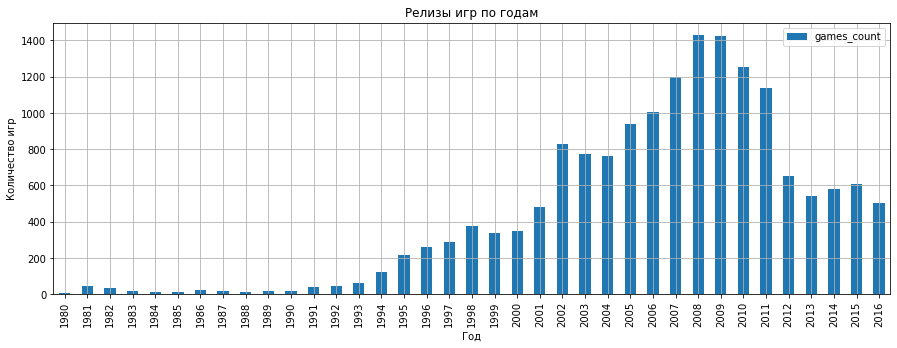

In [19]:
# вывод графика с выпущенными в разные года играми
games_by_year.plot(kind = 'bar', y = 'games_count', figsize = (15,5), grid = True)
plt.title('Релизы игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

По графику видно, что до 1994 года игр выпускалось мало, потом их количество начало активно расти. Появился персональный компьютер и приставка PS, развиваются языки программирования, игровая индустрия растет. Резкий скачок произошел в 2002 году, выход Xbox наверняка к этому причастен. Пик приходится на 2008 и 2009 года. Затем наблюдается спад, возможно связанный с кризисом. С 2012 года количество игр держится примерно на одном уровне. Уменьшение количества выпускаемых игр может быть связано с высокими требованиями геймеров к продукту: продуманный сюжет, красивая графика, интересные механики - хорошая игра может требовать годы разработки.

Можно считать, что данные за все периоды не важны. Нас интересуют годы с наибольшим количеством выпущенных игр - можно анализировать начиная с 1994 года, когда появилась PS, или с 2002 года, когда произошел скачок.

Следующая задача - посмотреть, как менялись продажи по платформам. Нужно выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Также посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

In [20]:
# создание сводной таблицы с продажами по платформам
platform_sales = pd.pivot_table(games, 
                                index = ['platform'], 
                                values = 'world_sales', 
                                aggfunc = 'sum').sort_values('world_sales', ascending = False)
# отбор самых популярных платформ
platform_sales.head(8)

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14


Все приставки серии PS видим тут. Посмотрим, как изменялись продажи по годам. Возьмем данные начиная с 1994 года (выход PS и увеличение продаж игр).

In [21]:
# сводная таблица с продажами по годам
platform_sales_by_year = (
    games.query('platform in @platform_sales.index and year_of_release >= 1994').pivot_table(index = 'year_of_release',
                                                                                             columns = 'platform',
                                                                                             values = 'world_sales',
                                                                                             aggfunc = 'sum'))
# вывод таблицы
platform_sales_by_year

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,...,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,...,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


Визуализируем данные, чтобы стало понятнее.

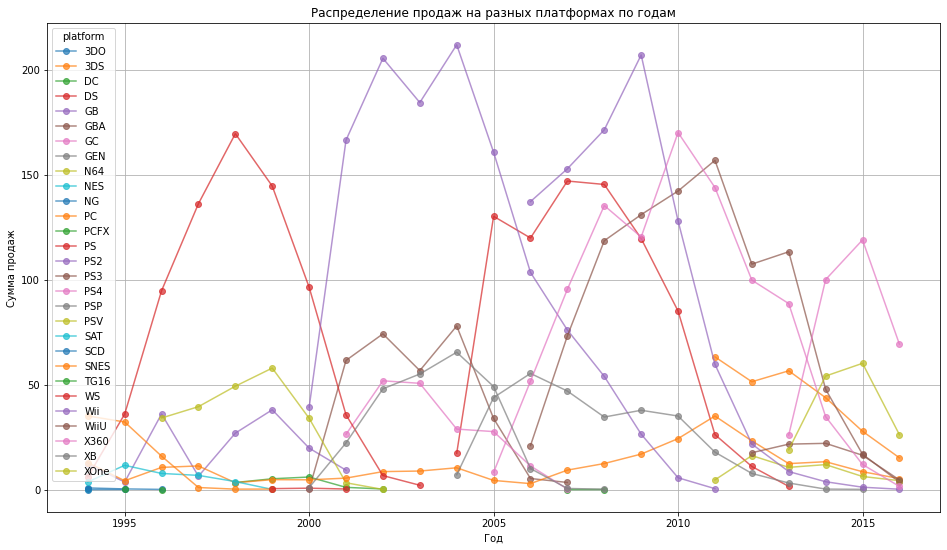

In [22]:
# график с продажами по годам
platform_sales_by_year.plot(
        style = 'o-', 
        figsize = (16,9),
        alpha = .7,
        grid = True)
plt.title('Распределение продаж на разных платформах по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

Одни платформы со временем приходят на смену другим. Продажи на одной платформе растут, на другой стремятся к нулю. Время не щадит никого, даже игровые платформы.

Что мы имеем по рассматриваемому периоду:

* PS потеряла свои позиции к 2003 году, с 1994 года она прожила 10 лет;

* PS2 существовала с 2000 до 2011 года - 11 лет;

* PS3 вышла в 2006 году и почти перестала продаваться в 2016 году, после выхода в 2013 году PS4 у нее не было шансов - 10 лет жизни;

* PS4 - с момента выхода еще продается, хотя в 2016 году продажи упали (помним, что за этот год данные могут быть неполными);

* GBA вышла в 2000 году и перестала продаваться в 2007, т.к. были более мощные конкуренты - 7 лет жизни;

* DS просуществовала с 2004 по 2013 год - 10 лет;

* Wii вышла в 2006 году, до 2016 года она сумела просуществовать, но продажи почти нулевые - 10 лет;

* Х360 с момента выхода в 2005 году держала позиции до 2011 года, затем продажи стали сильно падать, к 2016 году она почти не продается - 12 лет жизни.

Будем считать, что средний срок жизни платформы составляет 10 лет. За это время успевает смениться целое поколение геймеров. В первые 4-5 лет существования платформы она привлекает к себе большое внимание и пользуется популярностью, но затем сдает позиции и уступает место нововышедшим конкурентам, продолжая свое существование на рынке еще несколько лет.

В работе нам нужно взять данные за соответствующий актуальный период, эти данные помогут построить прогноз на 2017
год. Учитывать данные за предыдущие годы не нужно.

Возьмем данные начиная с 2011 года - в этом году уже закончила свое существование PS2, но другие платформы еще продаются. Также исключим из анализа 2016 год, поскольку данные могут быть неполными. Попробуем составить прогноз на 2017 год.

In [23]:
# выборка с актуальными данными
actual_games = games.query('2011 <= year_of_release <= 2015')

In [24]:
#сводная таблица с актуальными данными
market_forecast = actual_games.pivot_table(index = 'year_of_release',
                                           columns = 'platform',
                                           values = 'world_sales',
                                           aggfunc = 'sum')

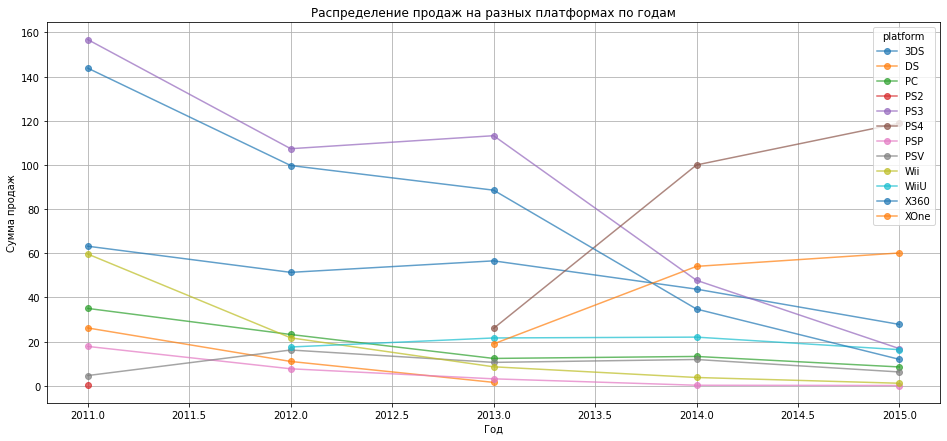

In [25]:
# график с продажами по актуальным данным
market_forecast.plot(
        style = 'o-', 
        figsize = (16,7),
        alpha = .7,
        grid = True)
plt.title('Распределение продаж на разных платформах по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.show()

Появление на рынке новых платформ PS4 и XОne говорит о том, что в первые 4-5 лет они будут популярны, и пик продаж придется примерно на 2017-2018 годы. Эти платформы самые перспективные, и нужно вкладываться именно в их развитие. На остальные платформы не нужно обращать внимание, т.к. они уже почти завершили свой жизненный цикл в 10 лет, их продажи минимальны. Можно попытаться продолжить развитие PS3 и X360, а также 3DS, так как из оставшихся платформ они наиболее прибыльные, но вложения должны быть умеренными, потому что скоро они могут исчезнуть с рынка.

Итак, потенциально прибыльные платформы - это PS4, XOne, PS3, X360, 3DS.

Следующая задача - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Возьмем самые популярные платформы за период с 2011 по 2015 годы.

In [26]:
# список популярных платформ
pop_platforms = platform_sales.head(8)

# отбор актуальных данных по самым популярным платформам
games_global_platforms = games.query('platform in @pop_platforms.index')
games_global_platforms = games_global_platforms.query('2011 >= year_of_release <= 2015')

(0.0, 1.8)

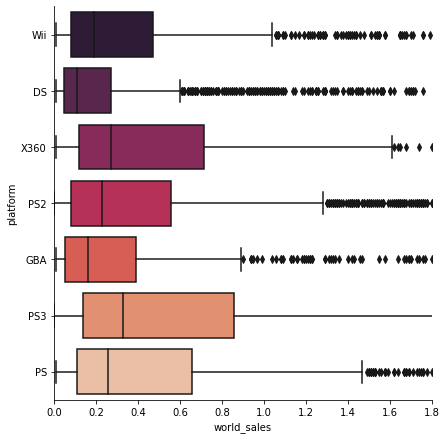

In [27]:
# "ящик с усами" по глобальным продажам игр на разных платформах
sns.catplot(y = 'platform',
            x = 'world_sales',
            kind = 'box',
            data = games_global_platforms,
            height = 6,
            palette = 'rocket')

plt.xlim(0, 1.8)

Посмотрим параметры распределения продаж.

In [28]:
# описательная статистика
games_global_platforms.groupby('platform')['world_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DS,2120.0,0.374325,1.426601,0.01,0.0500,0.11,0.2700,29.80
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.16,0.3900,15.84
PS,1197.0,0.610576,1.054502,0.01,0.1100,0.26,0.6600,10.95
PS2,2161.0,0.581106,1.137927,0.00,0.0800,0.23,0.5600,20.81
PS3,838.0,0.776683,1.344043,0.00,0.1400,0.33,0.8600,13.33
Wii,1266.0,0.688894,3.183713,0.01,0.0825,0.19,0.4700,82.54
X360,970.0,0.757608,1.586231,0.01,0.1200,0.27,0.7175,21.82


По количеству продаж в 2011-2015 гг. лидируют PS2, DS и Wii.
* cреднее количество продаж на платформе PS2 = 580 тыс. копий, 75% продаж равно 560 тыс., рекорд - 20 млн. 810 тыс.
* cреднее количество продаж на платформе DS = 370 тыс. копий, 75% продаж равно 270 тыс., рекорд - 29 млн. 800 тыс.
* cреднее количество продаж на платформе Wii = 690 тыс. копий, 75% продаж равно 470 тыс., рекорд - 82 млн. 540 тыс.


* рекорд продаж на платформе PS = 10 млн. 950 тыс.
* рекорд продаж на платформе PS3 = 13 млн. 330 тыс.
* рекорд продаж на платформе PSP = 7 млн. 680 тыс.
* рекорд продаж на платформе X360 = 21 млн. 820 тыс.
* рекорд продаж на платформе GBA = 15 млн. 840 тыс.

Медиана варьируется от 100 до 270 тыс. проданных копий. Верхняя граница предела нормальных значений у менее популярных платформ заканчивается там, где расположены нормальные значения у платформ-лидеров.

Меньше всего игр продается на приставке GBA.

Далее нужно посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Выберем для анализа лидера продаж - PS2.

In [29]:
# отбор данных по нужной платформе
ps2 = games_global_platforms.query('platform == "PS2" and (user_score != -1) and (critic_score != -1)')
# расчет корреляции
ps2[['world_sales', 'critic_score', 'user_score']].corr().head(1)

,world_sales,critic_score,user_score
world_sales,1.0,0.38922,0.16942


0.17
0.39


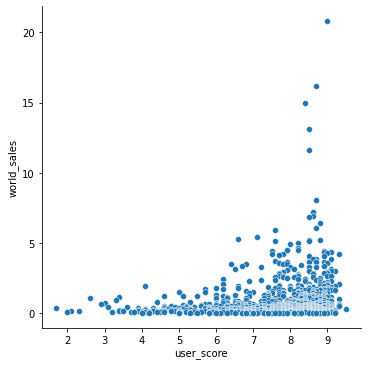

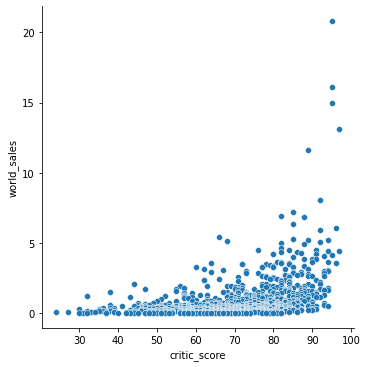

In [30]:
# диаграммы рассеяния
for column in ['user_score', 'critic_score']:
    print(round(ps2[column].corr(ps2['world_sales']), 2))
    sns.relplot(x = column, y = 'world_sales', data = ps2)

Данные говорят о том, что продажи не зависят от оценки пользователей, но есть небольшая корреляция продаж с оценкой критиков (это не позволяет достоверно утверждать, что эта оценка влияет на продажи).

Посмотрим корреляцию на других платформах.

In [31]:
# отбор данных по нужной платформе
ds = games_global_platforms.query('platform == "DS" and (user_score != -1) and (critic_score != -1)')
# расчет корреляции
ds[['world_sales', 'critic_score', 'user_score']].corr().head(1)

,world_sales,critic_score,user_score
world_sales,1.0,0.230995,0.139403


0.14
0.23


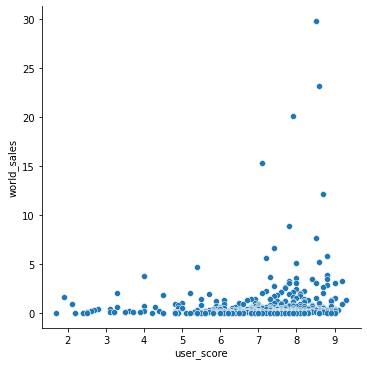

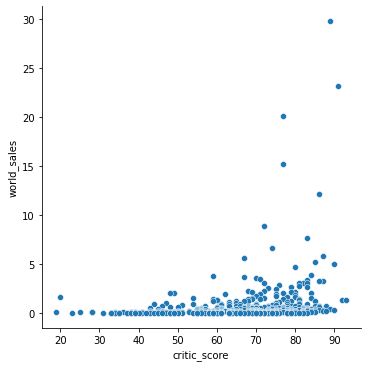

In [32]:
# диаграммы рассеяния
for column in ['user_score', 'critic_score']:
    print(round(ds[column].corr(ds['world_sales']), 2))
    sns.relplot(x = column, y = 'world_sales', data = ds)

Вывод такой же, как по приставке PS4.

In [33]:
# отбор данных по нужной платформе
wii = games_global_platforms.query('platform == "Wii" and (user_score != -1) and (critic_score != -1)')
# расчет корреляции
wii[['world_sales', 'critic_score', 'user_score']].corr().head(1)

,world_sales,critic_score,user_score
world_sales,1.0,0.168868,0.110034


0.11
0.17


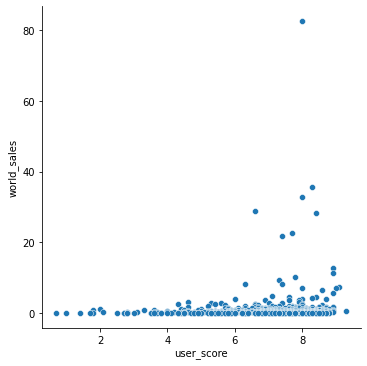

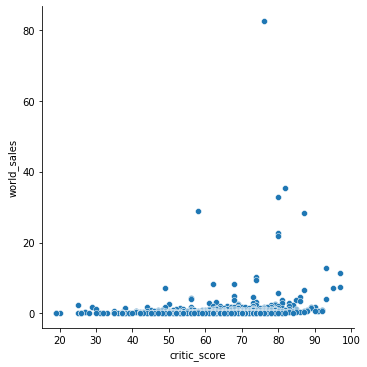

In [34]:
# диаграммы рассеяния
for column in ['user_score', 'critic_score']:
    print(round(wii[column].corr(wii['world_sales']), 2))
    sns.relplot(x = column, y = 'world_sales', data = wii)

Та же ситуация.

In [35]:
# отбор данных по нужной платформе
wii = games_global_platforms.query('platform == "Wii" and (user_score != -1) and (critic_score != -1)')
# расчет корреляции
wii[['world_sales', 'critic_score', 'user_score']].corr().head(1)

,world_sales,critic_score,user_score
world_sales,1.0,0.168868,0.110034


0.11
0.17


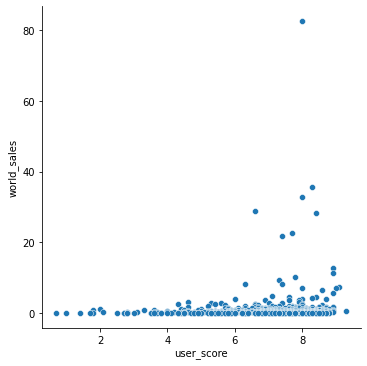

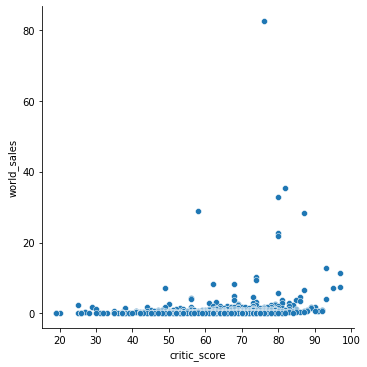

In [36]:
# диаграммы рассеяния
for column in ['user_score', 'critic_score']:
    print(round(wii[column].corr(wii['world_sales']), 2))
    sns.relplot(x = column, y = 'world_sales', data = wii)

Здесь влияние оценки критиков на продажи еще меньше.

Делаем вывод: оценки критиков средне влияют на количество продаж игр, оценки пользователей практически не влияют.

Последняя задача на этом шаге: нужно изучить общее распределение игр по жанрам, проанализировать самые прибыльные жанры, описать жанры с высокими и низкими продажами. Данные возьмем за 2011-2015 годы.

<AxesSubplot:title={'center':'Жанры игр по количеству'}, xlabel='genre'>

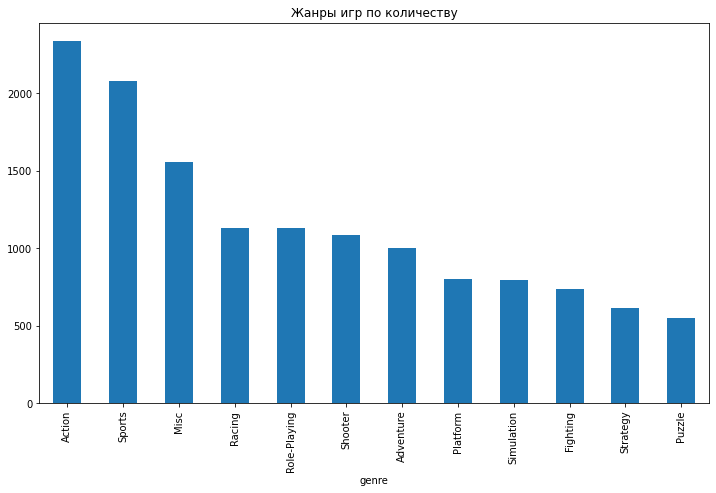

In [37]:
# отбор актуальных данных за выбранный период
games_global_for_genres = games.query('2011 >= year_of_release <= 2015')
games_global_for_genres.groupby('genre').agg('count')['name'].sort_values(ascending = False).plot(kind = 'bar', 
                                                                                y = 'name', 
                                                                                figsize = (12, 7),
                                                                                title = 'Жанры игр по количеству')

Итак, за весь период больше всего выпускалось игр в жанрах action, sports и misc, причем action - самый популярный жанр, отрыв довольно большой. Меньше всего игр выпущено в жанре fighting, strategy и puzzle.

<AxesSubplot:title={'center':'Жанры игр по продажам'}, xlabel='genre'>

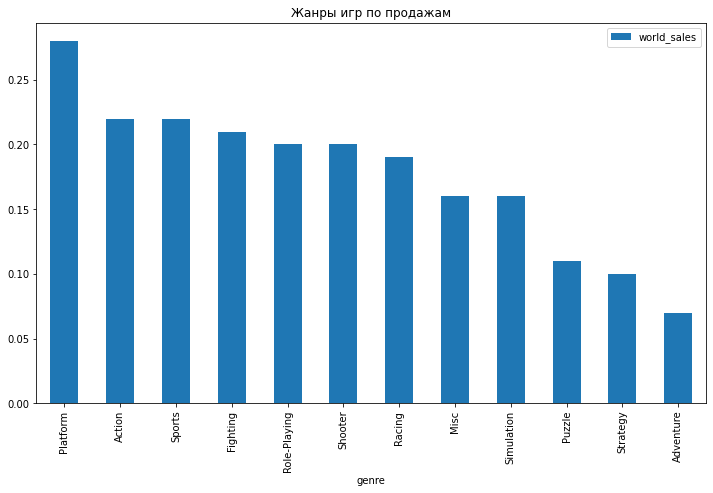

In [62]:
# таблица с медианами по продажам жанров игр
pop_genre = pd.pivot_table(games_global_for_genres, 
                           index = 'genre', 
                           values = 'world_sales', 
                           aggfunc = 'median').sort_values(by = 'world_sales', ascending = False)
pop_genre.plot(kind = 'bar',
               y = 'world_sales',
               figsize = (12, 7),
               title = 'Жанры игр по продажам')

Больше всего любят играть в игры жанра platform, менее популярны жанры action и shooter. Меньше всего людям нравятся паззлы, приключения и стратегии.

# Вывод №3

В результате анализа данных было получено много результатов. Вот итоги данного этапа.

Количество выпускаемых игр начало активно расти с 1994 года после появления первой приставки и развития компьютерных технологий. Резкий скачок произошел в 2002 году и вероятно связан с выходом Xbox. Расцвет игровой индустрии пришелся на 2008-2009 года, затем наблюдается спад.

В первые 4-5 лет существования платформы она привлекает к себе большое внимание и пользуется популярностью, но затем сдает позиции и уступает место нововышедшим конкурентам, продолжая свое существование на рынке еще несколько лет.

Потенциально прибыльные платформы в 2017 году - это PS4, XOne, PS3, X360, 3DS.

За весь анализируемый период больше всего игр продавалось на приставках X360, PS3 и PS4.

Оценки критиков средне влияют на количество продаж игр, оценки пользователей практически не влияют.

За весь период больше всего выпускалось игр в жанрах Action, Sports и Misc, причем Action - самый популярный жанр, отрыв довольно большой. Меньше всего игр выпущено в жанре Fighting, Strategy и Puzzle. Во все времена люди больше всего любят играть в игры жанра Action, менее популярны жанры Sports и Shooter. Меньше всего людям нравятся паззлы, приключения и стратегии.

# Шаг 4. Портрет пользователя каждого региона

Задачи этого шага:
* определить топ-5 популярных платформ, описать различия в долях продаж;
* определить топ-5 популярных жанров, пояснить разницу;
* ответить на вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расчеты ведутся по трем регионам (NA, EU, JP). Данные взяты за актуальный период (2011-2015 гг.).

Сначала определим 5 популярных платформ в каждом регионе. Построим сводные таблицы.

In [41]:
# сводная таблица с платформами в Америке
na_platform_pivot_table = pd.pivot_table(actual_games, 
                                         index = 'platform', 
                                         values = 'na_sales', 
                                         aggfunc = 'sum').sort_values('na_sales', ascending = False)
# топ-5 платформ в Америке
na_platform_pivot_table.head()

,na_sales
platform,
X360,226.11
PS3,167.59
PS4,87.25
XOne,78.85
3DS,78.51


In [42]:
# сводная таблица с платформами в Европе
eu_platform_pivot_table = pd.pivot_table(actual_games, 
                                         index = 'platform', 
                                         values = 'eu_sales', 
                                         aggfunc = 'sum').sort_values('eu_sales', ascending = False)
# топ-5 платформ в Европе
eu_platform_pivot_table.head()

,eu_sales
platform,
PS3,161.84
X360,116.39
PS4,109.31
3DS,58.94
PC,53.17


In [43]:
# сводная таблица с платформами в Японии
jp_platform_pivot_table = pd.pivot_table(actual_games, 
                                         index = 'platform', 
                                         values = 'jp_sales', 
                                         aggfunc = 'sum').sort_values('jp_sales', ascending = False)
# топ-5 платформ в Японии
jp_platform_pivot_table.head()

,jp_sales
platform,
3DS,92.59
PS3,48.09
PSP,24.04
PSV,18.28
WiiU,12.34


В Америке и Европе самые популярные платформы - X360, PS3 и PS4. PS3 продается примерно одинаково и больше популярна в Европе, американцы чаще играют на X360. В Японии популярные платформы совсем другие, самая популярная - 3DS, затем идут PS3 и PSP.

Проанализируем жанры.

In [44]:
# сводная таблица с жанрами в Америке
na_genre_pivot_table = pd.pivot_table(actual_games, 
                                      index = 'genre', 
                                      values = 'na_sales',
                                      aggfunc = 'sum').sort_values('na_sales', ascending = False)
# топ-5 жанров в Америке
na_genre_pivot_table.head()

,na_sales
genre,
Action,221.63
Shooter,178.19
Sports,101.16
Role-Playing,77.89
Misc,68.93


In [45]:
# сводная таблица с жанрами в Европе
eu_genre_pivot_table = pd.pivot_table(actual_games, 
                                      index = 'genre', 
                                      values = 'eu_sales',
                                      aggfunc = 'sum').sort_values('eu_sales', ascending = False)
# топ-5 жанров в Европе
eu_genre_pivot_table.head()

,eu_sales
genre,
Action,188.44
Shooter,132.12
Sports,76.47
Role-Playing,58.02
Misc,39.06


In [46]:
# сводная таблица с жанрами в Японии
jp_genre_pivot_table = pd.pivot_table(actual_games, 
                                      index = 'genre', 
                                      values = 'jp_sales',
                                      aggfunc = 'sum').sort_values('jp_sales', ascending = False)
# топ-5 жанров в Японии
jp_genre_pivot_table.head()

,jp_sales
genre,
Role-Playing,73.26
Action,56.55
Misc,16.56
Platform,12.02
Fighting,11.63


Американцы и европейцы любят одинаковые жанры, разница только в количестве продаж. Самые популярные жанры - Action, Shooter, Sports. Японцам нравятся совсем другие игры. Больше всего они любят ролевые игры, экшн и игры, сочетающие несколько жанров.

Осталось проанализировать рейтинг.

In [47]:
# сводная таблица с рейтингом в Америке
na_rating_pivot_table = pd.pivot_table(actual_games, 
                                       index = 'rating', 
                                       values = 'na_sales',
                                       aggfunc = 'sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table.head(7)

,na_sales
rating,
M,292.78
E,162.20
No ESRB,115.16
E10+,113.91
T,100.36
EC,0.42
RP,0.00


In [48]:
# сводная таблица с рейтингом в Европе
eu_rating_pivot_table = pd.pivot_table(actual_games, 
                                       index = 'rating', 
                                       values = 'eu_sales',
                                       aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_rating_pivot_table.head(7)

,eu_sales
rating,
M,233.72
E,128.12
No ESRB,109.14
E10+,74.19
T,73.37
RP,0.03
EC,0.00


In [49]:
# сводная таблица с рейтингом в Японии
jp_rating_pivot_table = pd.pivot_table(actual_games, 
                                       index = 'rating', 
                                       values = 'jp_sales',
                                       aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_rating_pivot_table.head(7)

,jp_sales
rating,
No ESRB,123.89
E,35.61
T,31.12
M,24.94
E10+,10.78
EC,0.00
RP,0.00


Снова Европа и Америка почти не отличаются по рейтингу, но количество продаж разное. Европа и Америка предпочитают в первую очередь игры для совершеннолетних, затем игры для любого возраста и игры для лиц старше 10 лет. В Японии больше всего популярны игры для всех, затем для подростков от 13 лет, на третьем месте игры для совершеннолетних.

# Вывод №4

Подытожим.

В Америке и Европе самые популярные платформы - X360, PS3 и PS4. PS3 продается примерно одинаково и больше популярна в Европе, американцы чаще играют на X360. В Японии популярные платформы совсем другие, самая популярная - 3DS, затем идут PS3 и PSP.

Американцы и европейцы любят одинаковые жанры, разница только в количестве продаж. Самые популярные жанры - Action, Shooter, Sports. Японцам нравятся совсем другие игры. Больше всего они любят ролевые игры, экшн и игры, сочетающие несколько жанров.

Европа и Америка почти не отличаются по возрастному рейтингу, но количество продаж разное. Европа и Америка предпочитают в первую очередь игры для совершеннолетних, затем игры для любого возраста и игры для лиц старше 10 лет. В Японии больше всего популярны игры для всех, затем для подростков от 13 лет, на третьем месте игры для совершеннолетних.

# Шаг 5. Проверка гипотез

Предстоит проверить две гипотезы:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы для каждого случая. Нулевая гипотеза формулируется всегда с использованием знака равенства, альтернативная - с обозначением неравенства.

Платформы:
* Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые (как в задании);
* Н1: средние пользовательские рейтинги платформ Xbox One и PC различны.

Жанры:
* Н0: средние пользовательские рейтинги жанров Action и Sports одинаковы;
* Н1: средние пользовательские рейтинги жанров Action и Sports разные (как в задании).

In [50]:
# фильтрация данных
actual_games_score = actual_games.query('user_score > 0')

# подготовка выборок
xone = actual_games_score.query('platform == "XOne"')['user_score']
pc = actual_games_score.query('platform == "PC"')['user_score']
action = actual_games_score.query('genre == "Action"')['user_score']
sports = actual_games_score.query('genre == "Sports"')['user_score']

Для проверки гипотез нужно посмотреть на статистику. Начнем с гипотезы о платформах.

In [51]:
# вывод статистики по платформам
print('Статистика по платформе XOne')
print('Среднее значение:', np.mean(xone))
print('Дисперсия:', np.var(xone, ddof = 1))
print('Стандартное отклонение:', np.std(xone, ddof = 1))
print()
print('Статистика по платформе PC')
print('Среднее значение:', np.mean(pc))
print('Дисперсия:', np.var(pc, ddof = 1))
print('Стандартное отклонение:', np.std(pc, ddof = 1))

Статистика по платформе XOne
Среднее значение: 6.477586206896552
Дисперсия: 1.6594932533733138
Стандартное отклонение: 1.2882132018316355

Статистика по платформе PC
Среднее значение: 6.47824427480916
Дисперсия: 2.528758591442193
Стандартное отклонение: 1.5902070907407604


Средние почти одинаковы, но дисперсии отличаются. Параметр `equal_var` будет равен `False`.

In [52]:
# проверка гипотезы о равенстве средних рейтингов платформ
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9966109146811735
Не получилось отвергнуть нулевую гипотезу


Предположение о равенстве среднего рейтинга верно. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Теперь проверим вторую гипотезу.

In [53]:
# вывод статистики по жанрам
print('Статистика по жанру Action')
print('Среднее значение:', np.mean(action))
print('Дисперсия:', np.var(action, ddof = 1))
print('Стандартное отклонение:', np.std(action, ddof = 1))
print()
print('Статистика по жанру Sports')
print('Среднее значение:', np.mean(sports))
print('Дисперсия:', np.var(sports, ddof = 1))
print('Стандартное отклонение:', np.std(sports, ddof = 1))

Статистика по жанру Action
Среднее значение: 6.796027633851468
Дисперсия: 1.7601399023492361
Стандартное отклонение: 1.326702642776156

Статистика по жанру Sports
Среднее значение: 5.689473684210526
Дисперсия: 2.66460020242915
Стандартное отклонение: 1.6323603163606832


Средние немного отличаются, как и дисперсии. Параметр `equal_var` будет равен `False`.

In [54]:
# проверка гипотезы о равенстве средних рейтингов жанров
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.049636834937507e-17
Отвергаем нулевую гипотезу


Получается, средние пользовательские рейтинги жанров Action и Sports различаются.

# Вывод №5

На данном шаге было выяснено, что первая гипотеза подтвердилась, а вторая - нет. Средние пользовательские рейтинги платформ Xbox One и PC, а также жанров Action и Sports одинаковы.

# Шаг 6. Общий вывод

Итоги работы:

В датасете:
* названия столбцов приведены к нижнему регистру;
* в столбце `name` удалены 2 строки с пропусками в названии игры;
* в столбце `year_of_Release` пропуски заменены на 0, тип заменен на `int`;
* в столбце `critic_Score` пропуски заменены на -1, тип заменен на `int`;
* в столбце `user_Score` пропуски заменены на -1, тип заменен на `float`, значение `tbd` заменено на -1;
* в столбце `rating` пропуски заменены на `No ESRB`;
* добавлен столбец с суммарными продажами по миру.

Количество выпускаемых игр начало активно расти с 1994 года после появления первой приставки и развития компьютерных технологий. Резкий скачок произошел в 2002 году и вероятно связан с выходом Xbox. Расцвет игровой индустрии пришелся на 2008-2009 года, затем наблюдается спад.

В первые 4-5 лет существования платформы она привлекает к себе большое внимание и пользуется популярностью, но затем сдает позиции и уступает место нововышедшим конкурентам, продолжая свое существование на рынке еще несколько лет.

Потенциально прибыльные платформы в 2017 году - это PS4, XOne, PS3, X360, 3DS.

За весь анализируемый период больше всего игр продавалось на приставках X360, PS3 и PS4.

Оценки критиков средне влияют на количество продаж игр, оценки пользователей практически не влияют.

За весь период больше всего выпускалось игр в жанрах Action, Sports и Misc, причем Action - самый популярный жанр, отрыв довольно большой. Меньше всего игр выпущено в жанре Fighting, Strategy и Puzzle. Во все времена люди больше всего любят играть в игры жанра Action, менее популярны жанры Sports и Shooter. Меньше всего людям нравятся паззлы, приключения и стратегии.

В Америке и Европе самые популярные платформы - X360, PS3 и PS4. PS3 продается примерно одинаково и больше популярна в Европе, американцы чаще играют на X360. В Японии популярные платформы совсем другие, самая популярная - 3DS, затем идут PS3 и PSP.

Американцы и европейцы любят одинаковые жанры, разница только в количестве продаж. Самые популярные жанры - Action, Shooter, Sports. Японцам нравятся совсем другие игры. Больше всего они любят ролевые игры, экшн и игры, сочетающие несколько жанров.

Европа и Америка почти не отличаются по возрастному рейтингу, но количество продаж разное. Европа и Америка предпочитают в первую очередь игры для совершеннолетних, затем игры для любого возраста и игры для лиц старше 10 лет. В Японии больше всего популярны игры для всех, затем для подростков от 13 лет, на третьем месте игры для совершеннолетних.

Средние пользовательские рейтинги платформ Xbox One и PC, а также жанров Action и Sports одинаковы.